<a href="https://colab.research.google.com/github/Giogeorge213/CreditCardSpend2022/blob/main/Credit22FInal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [339]:
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
import os

### Import CSVs and drop initial extra columns

In [340]:
df_list = []
path = '/CSV22'

In [341]:
for file in os.listdir(path):
    if file.endswith('csv') or file.endswith('CSV'):
        df = pd.read_csv(os.path.join(path,file))
        df_list.append(df)

In [342]:
cc = pd.concat(df_list, ignore_index=True)

In [343]:
cc.head()

,Trans. Date,Description,Amount,Expense Category,Date,Card Member,Category,Transaction Date,Post Date,Type,Memo,Debit,Card
0,8/20/22,BRITISH A 1252142828679,167.25,Airlines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/18/22,BRITISH A 1252142828679,-167.25,Airlines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/7/22,SPIRIT AIRL 4870322402776,88.59,Airlines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8/31/22,BURGER KING #19558,6.50,Amusement and Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8/20/22,GINO'S DELI & STOP N BUY,40.56,Amusement and Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
cc.drop('Card',axis=1,inplace=True)
cc.drop('Transaction Date',axis=1,inplace=True)
cc.drop('Memo',axis=1,inplace=True)
cc.drop('Card Member',axis=1,inplace=True)

### Make one Spend column cleanup data

In [345]:
cc.loc[cc['Debit'].notna()]

,Trans. Date,Description,Amount,Expense Category,Date,Category,Post Date,Type,Debit
275,NaN,H-E-B #178 SAN ANTONIO TX,NaN,NaN,5-Jun-22,Merchandise,NaN,NaN,17.24
276,NaN,Merchant Offers Credit NY,NaN,NaN,28-Aug-22,Miscellaneous,NaN,NaN,-10.0
277,NaN,MEMBERSHIP FEE AUG 22-JUL 23,NaN,NaN,18-Aug-22,Miscellaneous,NaN,NaN,95.0
278,NaN,Merchant Offers Credit NY,NaN,NaN,16-Jun-22,Miscellaneous,NaN,NaN,-5.0
279,NaN,Merchant Offers Credit NY,NaN,NaN,16-Jun-22,Miscellaneous,NaN,NaN,-10.0
...,...,...,...,...,...,...,...,...,...
1738,NaN,WAL-MART #5226 SAN ANTONIO TX,NaN,NaN,19-Oct-22,Vehicle Services,NaN,NaN,22.71
1739,NaN,SHELL OIL 57544281207 ROUND ROCK TX,NaN,NaN,7-Aug-22,Vehicle Services,NaN,NaN,57.58
1740,NaN,EXXONMOBIL 47951918 SAN ANTONIO TX,NaN,NaN,28-Jul-22,Vehicle Services,NaN,NaN,42.28
1741,NaN,CIRCLE K #2742010 SAN ANTONIO TX,NaN,NaN,27-Jul-22,Vehicle Services,NaN,NaN,41.35


In [346]:
cc.loc[cc['Amount'].notna()]

,Trans. Date,Description,Amount,Expense Category,Date,Category,Post Date,Type,Debit
0,8/20/22,BRITISH A 1252142828679,167.25,Airlines,NaN,NaN,NaN,NaN,NaN
1,9/18/22,BRITISH A 1252142828679,-167.25,Airlines,NaN,NaN,NaN,NaN,NaN
2,10/7/22,SPIRIT AIRL 4870322402776,88.59,Airlines,NaN,NaN,NaN,NaN,NaN
3,8/31/22,BURGER KING #19558,6.50,Amusement and Entertainment,NaN,NaN,NaN,NaN,NaN
4,8/20/22,GINO'S DELI & STOP N BUY,40.56,Amusement and Entertainment,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1897,NaN,HYATT REGENCY MILWAUKEE,68.24,NaN,NaN,Travel,01/13/2022,Return,NaN
1898,NaN,HYATT REGENCY MILWAUKEE,-100.72,NaN,NaN,Travel,01/12/2022,Sale,NaN
1899,NaN,HYATT REGENCY MILWAUKEE,-500.64,NaN,NaN,Travel,01/12/2022,Sale,NaN
1900,NaN,HYATT REGENCY MILWAUKEE,-471.12,NaN,NaN,Travel,01/12/2022,Sale,NaN


In [347]:
cc.fillna('', inplace=True)

In [348]:
cc = cc.replace('',0)

In [349]:
cc.head()

,Trans. Date,Description,Amount,Expense Category,Date,Category,Post Date,Type,Debit
0,8/20/22,BRITISH A 1252142828679,167.25,Airlines,0,0,0,0,0
1,9/18/22,BRITISH A 1252142828679,-167.25,Airlines,0,0,0,0,0
2,10/7/22,SPIRIT AIRL 4870322402776,88.59,Airlines,0,0,0,0,0
3,8/31/22,BURGER KING #19558,6.50,Amusement and Entertainment,0,0,0,0,0
4,8/20/22,GINO'S DELI & STOP N BUY,40.56,Amusement and Entertainment,0,0,0,0,0


Found a value with a comma while trying to combine columns into a Spend column

In [350]:
rows_with_comma = cc[cc['Debit'].str.contains(',', na=False)]
print(rows_with_comma)

     Trans. Date                            Description  Amount  \
1253           0  ALILA KOTHAIFARU MALDI KOTHAIFARU MDV     0.0   

     Expense Category      Date Category Post Date Type     Debit  
1253                0  4-Oct-22  Lodging         0    0  1,452.38  


In [351]:
cc.iloc[1253]

Trans. Date                                             0
Description         ALILA KOTHAIFARU MALDI KOTHAIFARU MDV
Amount                                                0.0
Expense Category                                        0
Date                                             4-Oct-22
Category                                          Lodging
Post Date                                               0
Type                                                    0
Debit                                            1,452.38
Name: 1253, dtype: object

In [352]:
cc.loc[1253,'Debit'] = 1452.38

In [353]:
cc.iloc[[1253]]

,Trans. Date,Description,Amount,Expense Category,Date,Category,Post Date,Type,Debit
1253,0,ALILA KOTHAIFARU MALDI KOTHAIFARU MDV,0.0,0,4-Oct-22,Lodging,0,0,1452.38


In [354]:
cc['Spend'] = cc['Amount'].astype(float) + cc['Debit'].astype(float)

In [355]:
cc.drop('Amount',axis=1,inplace=True)
cc.drop('Debit',axis=1,inplace=True)

In [356]:
cc.head()

,Trans. Date,Description,Expense Category,Date,Category,Post Date,Type,Spend
0,8/20/22,BRITISH A 1252142828679,Airlines,0,0,0,0,167.25
1,9/18/22,BRITISH A 1252142828679,Airlines,0,0,0,0,-167.25
2,10/7/22,SPIRIT AIRL 4870322402776,Airlines,0,0,0,0,88.59
3,8/31/22,BURGER KING #19558,Amusement and Entertainment,0,0,0,0,6.50
4,8/20/22,GINO'S DELI & STOP N BUY,Amusement and Entertainment,0,0,0,0,40.56


### Clean and combine Date columns

In [357]:
cc.loc[cc['Date'] != 0]

,Trans. Date,Description,Expense Category,Date,Category,Post Date,Type,Spend
45,0,MOBILE PAYMENT - THANK YOU,0,11/30/22,0,0,0,-9.74
46,0,AplPay PANDA EXPRESSSAN ANTONIO TX,0,11/22/22,Restaurant-Bar & Café,0,0,9.74
47,0,MOBILE PAYMENT - THANK YOU,0,11/11/22,0,0,0,-2.53
48,0,AUTOPAY PAYMENT - THANK YOU,0,11/4/22,0,0,0,-33.73
49,0,MCDONALD'S 10432 SAN ANTONIO TX,0,10/30/22,Restaurant-Bar & Café,0,0,2.53
...,...,...,...,...,...,...,...,...
1738,0,WAL-MART #5226 SAN ANTONIO TX,0,19-Oct-22,Vehicle Services,0,0,22.71
1739,0,SHELL OIL 57544281207 ROUND ROCK TX,0,7-Aug-22,Vehicle Services,0,0,57.58
1740,0,EXXONMOBIL 47951918 SAN ANTONIO TX,0,28-Jul-22,Vehicle Services,0,0,42.28
1741,0,CIRCLE K #2742010 SAN ANTONIO TX,0,27-Jul-22,Vehicle Services,0,0,41.35


In [358]:
cc.loc[cc['Trans. Date'] != 0]

,Trans. Date,Description,Expense Category,Date,Category,Post Date,Type,Spend
0,8/20/22,BRITISH A 1252142828679,Airlines,0,0,0,0,167.25
1,9/18/22,BRITISH A 1252142828679,Airlines,0,0,0,0,-167.25
2,10/7/22,SPIRIT AIRL 4870322402776,Airlines,0,0,0,0,88.59
3,8/31/22,BURGER KING #19558,Amusement and Entertainment,0,0,0,0,6.50
4,8/20/22,GINO'S DELI & STOP N BUY,Amusement and Entertainment,0,0,0,0,40.56
5,8/21/22,MOUNTAIN VIEW SPORTS,Amusement and Entertainment,0,0,0,0,38.30
6,9/13/22,"SACOLO, LTD",Amusement and Entertainment,0,0,0,0,9.71
7,9/13/22,"SACOLO, LTD",Amusement and Entertainment,0,0,0,0,13.30
8,8/19/22,SHIPLEY DO-NUTS - AUS,Amusement and Entertainment,0,0,0,0,2.50
9,9/11/22,SPORTS AND SOCIAL,Amusement and Entertainment,0,0,0,0,23.70


In [359]:
cc.loc[cc['Post Date'] != 0]

,Trans. Date,Description,Expense Category,Date,Category,Post Date,Type,Spend
94,0,Gopuff Credit,0,0,Fees & Adjustments,12/25/2022,Adjustment,10.00
95,0,GOPUFF,0,0,Groceries,12/25/2022,Sale,-15.24
96,0,Payment Thank You-Mobile,0,0,0,12/21/2022,Payment,383.71
97,0,LYFT *1 RIDE 12-19,0,0,Travel,12/21/2022,Sale,-19.85
98,0,PAYPAL *BESTBUY COM,0,0,Shopping,12/09/2022,Sale,-229.99
...,...,...,...,...,...,...,...,...
1897,0,HYATT REGENCY MILWAUKEE,0,0,Travel,01/13/2022,Return,68.24
1898,0,HYATT REGENCY MILWAUKEE,0,0,Travel,01/12/2022,Sale,-100.72
1899,0,HYATT REGENCY MILWAUKEE,0,0,Travel,01/12/2022,Sale,-500.64
1900,0,HYATT REGENCY MILWAUKEE,0,0,Travel,01/12/2022,Sale,-471.12


Get each date column to the same format and combine them and drop the old ones

In [360]:
cc['Date'] = cc['Date'].astype(str)

In [361]:
cc['Date'] = pd.to_datetime(cc['Date'],errors='coerce')

In [362]:
cc['Date'] = cc['Date'].dt.date

In [363]:
cc['Date'].describe()

count            976
unique           303
top       2022-09-17
freq              14
Name: Date, dtype: object

In [364]:
cc['Date'] = pd.to_datetime(cc['Date'],errors='coerce').dt.strftime('%m/%d/%y')

In [365]:
cc['Date'].value_counts(dropna=False)

NaN         926
09/17/22     14
07/18/22     14
07/19/22     13
02/03/22     12
           ... 
03/17/22      1
08/24/22      1
03/28/22      1
03/31/22      1
07/27/22      1
Name: Date, Length: 304, dtype: int64

In [366]:
cc['Post Date'] = cc['Post Date'].astype(str)

In [367]:
cc['Post Date'] = pd.to_datetime(cc['Post Date'],errors='coerce').dt.strftime('%m/%d/%y')

In [368]:
cc['Post Date'].value_counts(dropna=False)

NaN         1021
08/03/22      18
07/03/22      15
11/20/22      13
05/01/22      13
            ... 
12/22/22       1
01/19/22       1
01/17/22       1
01/14/22       1
12/13/22       1
Name: Post Date, Length: 244, dtype: int64

In [369]:
cc['Trans. Date'] = cc['Trans. Date'].astype(str)

In [370]:
cc['Trans. Date'] = pd.to_datetime(cc['Trans. Date'],errors='coerce').dt.strftime('%m/%d/%y')

In [371]:
cc['Trans. Date'].value_counts(dropna=False)

NaN         1857
09/13/22       4
08/19/22       3
09/02/22       3
08/25/22       3
08/23/22       3
08/20/22       3
10/13/22       2
08/31/22       2
10/08/22       2
09/06/22       2
08/17/22       2
08/21/22       2
08/18/22       1
09/01/22       1
09/10/22       1
11/02/22       1
10/03/22       1
09/03/22       1
09/11/22       1
10/12/22       1
10/20/22       1
08/16/22       1
10/10/22       1
09/18/22       1
10/07/22       1
08/26/22       1
Name: Trans. Date, dtype: int64

In [372]:
cc['Date'] = cc['Date'].fillna('')
cc['Post Date'] = cc['Post Date'].fillna('')
cc['Trans. Date'] = cc['Trans. Date'].fillna('')

In [373]:
cc['Date_'] = cc['Post Date']+ cc['Trans. Date'] + cc['Date']

In [374]:
cc['Date_'].value_counts(dropna=False)

08/03/22    24
07/18/22    21
07/03/22    19
07/19/22    17
03/07/22    16
            ..
01/26/22     1
02/12/22     1
02/19/22     1
02/28/22     1
09/14/22     1
Name: Date_, Length: 348, dtype: int64

In [375]:
cc.drop('Date',axis=1,inplace=True)
cc.drop('Trans. Date', axis=1,inplace=True)
cc.drop('Post Date',axis=1,inplace=True)
cc.head()

,Description,Expense Category,Category,Type,Spend,Date_
0,BRITISH A 1252142828679,Airlines,0,0,167.25,08/20/22
1,BRITISH A 1252142828679,Airlines,0,0,-167.25,09/18/22
2,SPIRIT AIRL 4870322402776,Airlines,0,0,88.59,10/07/22
3,BURGER KING #19558,Amusement and Entertainment,0,0,6.50,08/31/22
4,GINO'S DELI & STOP N BUY,Amusement and Entertainment,0,0,40.56,08/20/22


In [376]:
cc = cc.rename(columns={'Date_':'Date'})
cc = cc.reindex(columns=['Date'] + list(cc.columns[:-1]))

In [377]:
cc = cc.sort_values('Date')
cc = cc.reset_index(drop=True)
cc.index += 1

### Combine and clean up Category column.

In [378]:
cc.loc[cc['Expense Category'] == 0]

,Date,Description,Expense Category,Category,Type,Spend
1,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,0,Travel-Airline,0,-57.06
2,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,0,Travel-Airline,0,-15.70
3,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,0,Travel-Airline,0,61.55
4,01/01/22,TURKISH AIRLINES WEBTURKEY TU,0,Travel-Airline,0,135.40
5,01/02/22,PAYPAL *COLUMBIASPO,0,Shopping,Sale,-105.74
...,...,...,...,...,...,...
1898,12/30/22,GRAB BANGKOK TH,0,Transportation-Taxis & Coach,0,13.45
1899,12/30/22,GRAB BANGKOK TH,0,Transportation-Taxis & Coach,0,4.34
1900,12/30/22,GRAB BANGKOK TH,0,Transportation-Taxis & Coach,0,1.24
1901,12/30/22,GRAB BANGKOK TH,0,Transportation-Taxis & Coach,0,1.16


In [379]:
cc.loc[cc['Category'] == 0]

,Date,Description,Expense Category,Category,Type,Spend
8,01/03/22,Payment Thank You-Mobile,0,0,Payment,405.59
11,01/03/22,Payment Thank You-Mobile,0,0,Payment,737.56
17,01/04/22,MOBILE PAYMENT - THANK YOU,0,0,0,-95.00
25,01/08/22,MOBILE PAYMENT - THANK YOU,0,0,0,-200.00
54,01/16/22,Payment Thank You-Mobile,0,0,Payment,372.91
...,...,...,...,...,...,...
1849,12/21/22,Payment Thank You-Mobile,0,0,Payment,383.71
1852,12/21/22,Payment Thank You-Mobile,0,0,Payment,308.61
1853,12/21/22,MOBILE PAYMENT - THANK YOU,0,0,0,-2967.00
1864,12/22/22,MOBILE PAYMENT - THANK YOU,0,0,0,-4000.00


In [380]:
cc['Category'] = cc['Category'].replace(0,'')
cc['Expense Category'] = cc['Expense Category'].replace(0,'')

In [381]:
cc['Category_'] = cc['Category'].astype(str) + cc['Expense Category'].astype(str)

In [382]:
cc['Category_'].value_counts(dropna=False)

Food & Drink                            266
Travel-Airline                          241
                                        173
Travel                                  106
Shopping                                105
                                       ... 
Business Services-Mailing & Shipping      1
Repair & Maintenance                      1
Entertainment-General Attractions         1
Home                                      1
Transportation-Other Transportation       1
Name: Category_, Length: 77, dtype: int64

In [383]:
cc.head()

,Date,Description,Expense Category,Category,Type,Spend,Category_
1,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,,Travel-Airline,0,-57.06,Travel-Airline
2,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,,Travel-Airline,0,-15.70,Travel-Airline
3,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,,Travel-Airline,0,61.55,Travel-Airline
4,01/01/22,TURKISH AIRLINES WEBTURKEY TU,,Travel-Airline,0,135.40,Travel-Airline
5,01/02/22,PAYPAL *COLUMBIASPO,,Shopping,Sale,-105.74,Shopping


In [384]:
cc.drop('Category',axis=1,inplace=True)
cc.drop('Expense Category',axis=1,inplace=True)

In [385]:
cc.head()

,Date,Description,Type,Spend,Category_
1,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,0,-57.06,Travel-Airline
2,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,0,-15.70,Travel-Airline
3,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,0,61.55,Travel-Airline
4,01/01/22,TURKISH AIRLINES WEBTURKEY TU,0,135.40,Travel-Airline
5,01/02/22,PAYPAL *COLUMBIASPO,Sale,-105.74,Shopping


Type column is Chase data. Create new df of relavant credit card spends then drop Type column

In [386]:
cc['Description'] = cc['Description'].str.upper()
cc['Category_'] = cc['Category_'].str.upper()

In [387]:
cc.loc[cc['Type'] != 0]

,Date,Description,Type,Spend,Category_
5,01/02/22,PAYPAL *COLUMBIASPO,Sale,-105.74,SHOPPING
7,01/02/22,CKO*PATREON* MEMBERSHIP,Sale,-5.41,ENTERTAINMENT
8,01/03/22,PAYMENT THANK YOU-MOBILE,Payment,405.59,
11,01/03/22,PAYMENT THANK YOU-MOBILE,Payment,737.56,
20,01/06/22,SPOTHERO 844-356-8054,Return,1.00,TRAVEL
...,...,...,...,...,...
1889,12/27/22,AMAZON.COM*OX2VT3QT3,Sale,-432.98,MERCHANDISE & INVENTORY
1890,12/27/22,GOPUFF,Sale,-18.94,GROCERIES
1891,12/27/22,WALMART.COM,Sale,-179.98,MERCHANDISE & INVENTORY
1894,12/29/22,HYATT PLACE BANGKOK,Sale,-127.11,TRAVEL


payment1 = payments made to Chase and American Express credit cards. CSV of Citi and BOA don't list payments

In [388]:
payment1 = cc[cc['Description'].str.contains('PAYMENT')]

In [389]:
payment1.value_counts()

Date      Description                        Type     Spend     Category_
01/03/22  PAYMENT THANK YOU-MOBILE           Payment   405.59                1
10/11/22  PAYMENT THANK YOU-MOBILE           Payment   40.30                 1
09/13/22  MOBILE PAYMENT - THANK YOU         0        -92.05                 1
09/17/22  MOBILE PAYMENT - THANK YOU         0        -235.36                1
09/20/22  MOBILE PAYMENT - THANK YOU         0        -448.20                1
                                                                            ..
05/26/22  PAYMENT THANK YOU-MOBILE           Payment   500.00                1
                                                       1500.00               1
06/02/22  AUTOPAY PAYMENT - THANK YOU        0        -35.00                 1
06/03/22  MOBILE PAYMENT - THANK YOU         0        -500.00                1
12/25/22  RETURN PROTECTION BENEFIT PAYMENT  0        -70.00                 1
Length: 173, dtype: int64

In [390]:
payment1['Spend'].sum()

24589.58

In [391]:
cc.drop(payment1.index,axis=0,inplace=True)

In [392]:
cc['Type'].value_counts(dropna=False)

0             945
Sale          713
Adjustment     55
Return         10
Fee             4
Reversal        1
Refund          1
Name: Type, dtype: int64

In [393]:
cc['Type'] = cc['Type'].replace(0, '')

find chase returns and purchases then drop them

In [394]:
chase_returns = cc[cc['Type'].str.contains('Return')]

In [395]:
chase_returns

,Date,Description,Type,Spend,Category_
20,01/06/22,SPOTHERO 844-356-8054,Return,1.00,TRAVEL
41,01/13/22,HYATT REGENCY MILWAUKEE,Return,138.48,TRAVEL
44,01/13/22,HYATT REGENCY MILWAUKEE,Return,68.24,TRAVEL
59,01/17/22,VIATORTRIPADVISOR US,Return,117.57,TRAVEL
547,05/01/22,HYATT REGENCY O'HARE,Return,34.00,TRAVEL
865,06/19/22,VIATORTRIPADVISOR US,Return,127.86,TRAVEL
1106,08/01/22,AMZN MKTP US,Return,18.99,SHOPPING
1255,08/26/22,ACE RENT A CAR - CO,Return,200.00,TRAVEL
1684,11/23/22,PAYPAL *APPLE INC,Return,3895.92,SHOPPING
1895,12/29/22,PAYPAL *BESTBUY COM,Return,799.99,SHOPPING


In [396]:
chase_returns['Spend'].sum()

5402.05

In [397]:
chase_purchases = cc.loc[(cc['Spend'] < 0) & (cc['Spend'].abs().isin(chase_returns['Spend'])) & (cc['Description'].isin(chase_returns['Description']))]

In [398]:
chase_purchases

,Date,Description,Type,Spend,Category_
47,01/14/22,VIATORTRIPADVISOR US,Sale,-117.57,TRAVEL
546,05/01/22,HYATT REGENCY O'HARE,Sale,-34.00,TRAVEL
802,06/10/22,VIATORTRIPADVISOR US,Sale,-127.86,TRAVEL
1240,08/22/22,ACE RENT A CAR - CO,Sale,-200.00,TRAVEL
1648,11/17/22,PAYPAL *APPLE INC,Sale,-3895.92,SHOPPING
1692,11/24/22,PAYPAL *BESTBUY COM,Sale,-799.99,SHOPPING


In [399]:
cc.drop(chase_returns.index,axis=0,inplace=True)
cc.drop(chase_purchases.index,axis=0,inplace=True)

Credits and Interest. Drop the credits.

In [400]:
chase_credits = cc[(cc['Type'].str.contains('Adjustment')) | (cc['Type'].str.contains('Reversal'))
| (cc['Type'].str.contains('Refund'))]

In [401]:
chase_credits.head()

,Date,Description,Type,Spend,Category_
96,01/31/22,CHIPOTLE ONLINE,Adjustment,61.54,FOOD & DRINK
173,02/16/22,OFFER:HYATT (HYATT HOT,Adjustment,25.00,FEES & ADJUSTMENTS
188,02/22/22,ANNUAL HOTEL CREDIT,Adjustment,50.00,FEES & ADJUSTMENTS
325,03/28/22,OFFER:CHEVRON (PAY AT,Adjustment,2.50,FEES & ADJUSTMENTS
329,03/28/22,OFFER:CHEVRON (PAY AT,Adjustment,0.84,FEES & ADJUSTMENTS


In [402]:
chase_credits['Spend'].sum()

901.91

In [403]:
cc.drop('Type',axis=1,inplace=True)
cc.drop(chase_credits.index,axis=0,inplace=True)

In [404]:
cc['Description'].value_counts(dropna=False)

AMERICAN AIRLINES 45800-433-7300        TX    112
GOPUFF                                         36
UNITED AIRLINES     HOUSTON             TX     30
SOUTHWEST AIRLINES  DALLAS              TX     25
GRAB.COM       *A-3NJAKARTA SLT                25
                                             ... 
TRIP.COM                                        1
JEWEL OSCO 3473 DES PLAINES IL                  1
WAL-MART SUPERCENTERWEST BEND           WI      1
JEWEL OSCO 3461 ARLINGTON HEI IL                1
GUCCI ECOMMERCE     NEW YORK            NY      1
Name: Description, Length: 915, dtype: int64

In [405]:
cc.loc[cc['Description']==0]

,Date,Description,Spend,Category_


In [406]:
citi_offers = cc.loc[cc['Description'].str.contains('OFFER')]

In [407]:
citi_offers

,Date,Description,Spend,Category_
651,05/18/22,MERCHANT OFFERS CREDIT NY,-10.0,MISCELLANEOUS
658,05/19/22,MERCHANT OFFERS CREDIT NY,-10.0,MISCELLANEOUS
665,05/19/22,MERCHANT OFFERS CREDIT NY,-10.0,MISCELLANEOUS
666,05/19/22,MERCHANT OFFERS CREDIT NY,-10.0,MISCELLANEOUS
762,06/03/22,MERCHANT OFFERS CREDIT NY,-10.0,MISCELLANEOUS
837,06/16/22,MERCHANT OFFERS CREDIT NY,-10.0,MISCELLANEOUS
840,06/16/22,MERCHANT OFFERS CREDIT NY,-5.0,MISCELLANEOUS
841,06/16/22,MERCHANT OFFERS CREDIT NY,-10.0,MISCELLANEOUS
1139,08/04/22,MERCHANT OFFERS CREDIT NY,-5.0,MISCELLANEOUS
1141,08/04/22,MERCHANT OFFERS CREDIT NY,-5.0,MISCELLANEOUS


In [408]:
cc.drop(citi_offers.index,axis=0,inplace=True)

In [409]:
Interest_Paid = cc.loc[cc['Description'].str.contains('INTEREST')]

In [410]:
Interest_Paid['Spend'].sum()

136.21

In [411]:
ax_air_credit = cc.loc[cc['Description'].str.contains('REIMBURSE')]

In [412]:
ax_air_credit

,Date,Description,Spend,Category_
46,01/14/22,AMEX AIRLINE FEE REIMBURSEMENT,-68.98,TRAVEL-AIRLINE
121,02/08/22,AMEX AIRLINE FEE REIMBURSEMENT,-88.98,TRAVEL-AIRLINE
124,02/08/22,AMEX AIRLINE FEE REIMBURSEMENT,-20.62,TRAVEL-AIRLINE
125,02/08/22,AMEX AIRLINE FEE REIMBURSEMENT,-5.60,TRAVEL-AIRLINE
126,02/08/22,AMEX AIRLINE FEE REIMBURSEMENT,-5.60,TRAVEL-AIRLINE
282,03/17/22,AMEX AIRLINE FEE REIMBURSEMENT,-10.22,TRAVEL-AIRLINE
532,04/29/22,AMEX AIRLINE FEE REIMBURSEMENT,-79.78,TRAVEL-AIRLINE
870,06/20/22,AMEX AIRLINE FEE REIMBURSEMENT,-93.98,TRAVEL-AIRLINE
1377,09/16/22,AMEX AIRLINE FEE REIMBURSEMENT,-66.14,TRAVEL-AIRLINE


In [413]:
cc.drop(ax_air_credit.index,axis=0,inplace=True)

In [414]:
ax_credit = cc.loc[cc['Description'].str.contains('CREDIT')]

In [415]:
ax_credit['Spend'].sum()

-718.91

In [416]:
cc.drop(ax_credit.index,axis=0,inplace=True)

I book and cancel domestic airline award flights so I have to distinguish these and drop the corresponding pairs

In [417]:
aa_purchases = cc.loc[cc['Description'].str.contains('AMERICAN') & (cc['Spend'] > 0)]

In [418]:
aa_purchases

,Date,Description,Spend,Category_
3,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,61.55,TRAVEL-AIRLINE
9,01/03/22,AMERICAN AIRLINES 45800-433-7300 TX,28.70,TRAVEL-AIRLINE
13,01/04/22,AMERICAN AIRLINES 45800-433-7300 TX,5.60,TRAVEL-AIRLINE
48,01/15/22,AMERICAN AIRLINES 45800-433-7300 TX,36.00,TRAVEL-AIRLINE
52,01/16/22,AMERICAN AIRLINES 45800-433-7300 TX,5.60,TRAVEL-AIRLINE
...,...,...,...,...
1461,10/07/22,AMERICAN AIRLINES 45800-433-7300 TX,5.60,TRAVEL-AIRLINE
1786,12/12/22,AMERICAN AIRLINES 45800-433-7300 TX,5.60,TRAVEL-AIRLINE
1791,12/12/22,AMERICAN AIRLINES 45800-433-7300 TX,5.60,TRAVEL-AIRLINE
1794,12/13/22,AMERICAN AIRLINES 45800-433-7300 TX,5.60,TRAVEL-AIRLINE


In [419]:
aa_returns = cc.loc[cc['Description'].str.contains('AMERICAN') & (cc['Spend'] < 0)]

In [420]:
aa_returns

,Date,Description,Spend,Category_
1,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,-57.06,TRAVEL-AIRLINE
2,01/01/22,AMERICAN AIRLINES 45800-433-7300 TX,-15.70,TRAVEL-AIRLINE
35,01/11/22,AMERICAN AIRLINES 45800-433-7300 TX,-61.55,TRAVEL-AIRLINE
36,01/11/22,AMERICAN AIRLINES 45800-433-7300 TX,-28.70,TRAVEL-AIRLINE
53,01/16/22,AMERICAN AIRLINES 45800-433-7300 TX,-39.78,TRAVEL-AIRLINE
71,01/18/22,AMERICAN AIRLINES 45800-433-7300 TX,-11.20,TRAVEL-AIRLINE
77,01/24/22,AMERICAN AIRLINES 45800-433-7300 TX,-5.60,TRAVEL-AIRLINE
78,01/24/22,AMERICAN AIRLINES 45800-433-7300 TX,-65.59,TRAVEL-AIRLINE
104,02/03/22,AMERICAN AIRLINES 45800-433-7300 TX,-5.60,TRAVEL-AIRLINE
110,02/03/22,AMERICAN AIRLINES 45800-433-7300 TX,-5.60,TRAVEL-AIRLINE


In [421]:
aa_paired = cc.loc[(cc['Spend'] > 0) & (cc['Spend'].isin(aa_returns['Spend'].abs())) & (cc['Description'].str.contains("AMERICAN"))]

In [422]:
cc.drop(aa_paired.index,axis=0,inplace=True)
cc.drop(aa_returns.index,axis=0,inplace=True)

In [423]:
cc.describe()

,Spend
count,1510.000000
mean,-4.009172
std,250.037865
min,-3000.000000
25%,-18.927500
50%,-3.000000
75%,19.992500
max,3064.560000


In [424]:
wn_purchases = cc.loc[cc['Description'].str.contains('SOUTHWEST') & (cc['Spend'] > 0)]
wn_returns = cc.loc[cc['Description'].str.contains('SOUTHWEST') & (cc['Spend'] < 0)]

In [425]:
wn_paired = cc.loc[(cc['Spend'] > 0) & (cc['Spend'].isin(wn_returns['Spend'].abs())) & (cc['Description'].str.contains("SOUTHWEST"))]

In [426]:
cc.drop(wn_paired.index,axis=0,inplace=True)
cc.drop(wn_returns.index,axis=0,inplace=True)

In [427]:
dl_purchases = cc.loc[cc['Description'].str.contains('DELTA') & (cc['Spend'] > 0)]
dl_returns = cc.loc[cc['Description'].str.contains('DELTA') & (cc['Spend'] < 0)]

In [428]:
dl_paired = cc.loc[(cc['Spend'] > 0) & (cc['Spend'].isin(wn_returns['Spend'].abs())) & (cc['Description'].str.contains("DELTA"))]

In [429]:
cc.drop(dl_paired.index,axis=0,inplace=True)
cc.drop(dl_returns.index,axis=0,inplace=True)

In [430]:
ua_purchases = cc.loc[cc['Description'].str.contains('UNITED') & (cc['Spend'] > 0)]
ua_returns = cc.loc[cc['Description'].str.contains('UNITED') & (cc['Spend'] < 0)]

In [431]:
ua_paired = cc.loc[(cc['Spend'] > 0) & (cc['Spend'].isin(ua_returns['Spend'].abs())) & (cc['Description'].str.contains("UNITED"))]

In [432]:
cc.drop(ua_paired.index,axis=0,inplace=True)
cc.drop(ua_returns.index,axis=0,inplace=True)

In [433]:
cc.reset_index(drop=True, inplace=True)

In [434]:
cc.loc[cc['Spend'] < 0]

,Date,Description,Spend,Category_
1,01/02/22,PAYPAL *COLUMBIASPO,-105.74,SHOPPING
2,01/02/22,CKO*PATREON* MEMBERSHIP,-5.41,ENTERTAINMENT
4,01/04/22,APLPAY SPOTHERO 844-CHICAGO IL,-44.00,TRANSPORTATION-PARKING CHARGES
8,01/05/22,SPOTHERO 844-356-8054 CHICAGO IL,-30.25,VEHICLE SERVICES
9,01/05/22,WALMART PLUS MONTHLYBENTONVILLE,-12.95,MERCHANDISE & SUPPLIES-INTERNET PURCHASE
...,...,...,...,...
1427,12/27/22,AMAZON.COM*OX2VT3QT3,-432.98,MERCHANDISE & INVENTORY
1428,12/27/22,GOPUFF,-18.94,GROCERIES
1429,12/27/22,WALMART.COM,-179.98,MERCHANDISE & INVENTORY
1432,12/29/22,HYATT PLACE BANGKOK,-127.11,TRAVEL


Addressed the returns and credits. Making the whole Spend column positive

In [435]:
cc['Spend'] = cc['Spend'].abs()

In [436]:
cc['Spend'].describe()

count    1440.000000
mean       85.914451
std       241.109952
min         0.010000
25%         7.580000
50%        20.000000
75%        50.262500
max      3064.560000
Name: Spend, dtype: float64

In [437]:
cc = cc.rename(columns={'Category_':'Category'})

### Consolidate Category column

In [438]:
cc['Category'].value_counts()

FOOD & DRINK                                 264
SHOPPING                                     100
TRAVEL                                        94
GAS                                           76
GROCERIES                                     70
                                            ... 
REPAIR SERVICES                                1
BUSINESS SERVICES-MAILING & SHIPPING           1
TRANSPORTATION-VEHICLE LEASING & PURCHASE      1
REPAIR & MAINTENANCE                           1
TRANSPORTATION-OTHER TRANSPORTATION            1
Name: Category, Length: 77, dtype: int64

In [439]:
cc['Category'].unique()

array(['TRAVEL-AIRLINE', 'SHOPPING', 'ENTERTAINMENT',
       'TRANSPORTATION-PARKING CHARGES',
       'MERCHANDISE & SUPPLIES-CLOTHING STORES',
       'MERCHANDISE & SUPPLIES-INTERNET PURCHASE', 'VEHICLE SERVICES',
       'MERCHANDISE & SUPPLIES-WHOLESALE STORES', 'RESTAURANT-RESTAURANT',
       'FOOD & DRINK', 'TRAVEL', 'ENTERTAINMENT-OTHER ENTERTAINMENT',
       'OTHER-EDUCATION', 'OTHER-MISCELLANEOUS', 'TRAVEL-TRAVEL AGENCIES',
       'COMMUNICATIONS-CABLE & INTERNET COMM',
       'ENTERTAINMENT-ASSOCIATIONS',
       'FEES & ADJUSTMENTS-FEES & ADJUSTMENTS', 'EDUCATION',
       'BUSINESS SERVICES-HEALTH CARE SERVICES',
       'MERCHANDISE & SUPPLIES-ELECTRONICS STORES',
       'MERCHANDISE & SUPPLIES-DEPARTMENT STORES', 'FEES & ADJUSTMENTS',
       'MERCHANDISE & INVENTORY', 'PROFESSIONAL SERVICES', 'RESTAURANTS',
       'TRANSPORTATION-FUEL', 'RESTAURANT-BAR & CAFÉ', 'TRAVEL-LODGING',
       'MERCHANDISE & SUPPLIES-GROCERIES', 'OTHER-GOVERNMENT SERVICES',
       'BUSINESS SERVICES-O

Categorize empty String

In [440]:
cc.loc[cc['Category'] == '']

,Date,Description,Spend,Category
964,09/01/22,ANNUAL CARD FEE,25.0,


Consolidate Category column

In [441]:
cc.loc[965,'Category'] = 'ANNUAL FEES'

In [442]:
cc.loc[cc['Category'].str.contains('FEES'), 'Category'] = 'FEES/ADJUSTMENTS'
cc.loc[cc['Category'].str.contains('TRAVEL|AIRLINES|LODGING'),'Category'] = 'TRAVEL'
cc.loc[cc['Category'].str.contains('TRANSPORTATION|AUTOMOTIVE'), 'Category'] = 'TRANSPORTATION'
cc.loc[cc['Category'].str.contains('HEALTH'), 'Category'] = 'HEALTHCARE'
cc.loc[cc['Category'].str.contains('VEHICLE|GAS'),'Category'] = 'GAS/MISC CAR'
cc.loc[cc['Category'].str.contains('BUSINESS|OFFICE|PROFESSIONAL'), 'Category'] = 'BUSINESS SERVICES'
cc.loc[cc['Category'].str.contains('GROCER'), 'Category'] = 'GROCERY'

In [443]:
cc.loc[cc['Description'].str.contains('QT 4|SHELL|CIRCLE K|EXXON|7-ELEVEN|BP#|PIC N PAC'),'Category'] = 'GAS/MISC CAR'

In [444]:
cc.loc[cc['Description'].str.contains('H-E-B'),'Category'] = 'GROCERY'

In [445]:
cc.loc[cc['Category'].str.contains('MERCHANDISE'), 'Category'] = 'MERCHANDISE'

In [446]:
cc.loc[cc['Category'].str.contains('ENTERTAINMENT')]

,Date,Description,Spend,Category
2,01/02/22,CKO*PATREON* MEMBERSHIP,5.41,ENTERTAINMENT
26,01/13/22,DRAFTKINGS INC BOSTON MA,10.00,ENTERTAINMENT-OTHER ENTERTAINMENT
36,01/18/22,LA FITNESS CORP INTLIRVINE CA,32.46,ENTERTAINMENT-ASSOCIATIONS
39,01/20/22,DRAFTKINGS INC BOSTON MA,10.00,ENTERTAINMENT-OTHER ENTERTAINMENT
55,02/02/22,CKO*PATREON* MEMBERSHIP,5.41,ENTERTAINMENT
114,02/18/22,LA FITNESS CORP INTLIRVINE CA,32.46,ENTERTAINMENT-ASSOCIATIONS
139,03/02/22,PYM*KEEPR STORAGE PH,3.90,ENTERTAINMENT
141,03/02/22,CKO*PATREON* MEMBERSHIP,5.41,ENTERTAINMENT
175,03/12/22,APLPAY BIRD* NEG BALSANTA MONICA CA,10.00,ENTERTAINMENT-OTHER ENTERTAINMENT
195,03/18/22,LA FITNESS CORP INTLIRVINE CA,32.46,ENTERTAINMENT-ASSOCIATIONS


In [447]:
cc.loc[cc['Category'].str.contains('AMUSEMENT AND ENTERTAINMENT'), 'Category'] = 'FOOD/DRINK'

In [448]:
cc.loc[cc['Description'].str.contains('STEAM GAMES'),'Category'] = 'MERCHANDISE'

In [449]:
cc.loc[cc['Category'].str.contains('ENTERTAINMENT'), 'Category'] = 'GYM/ENTERTAINMENT'
cc.loc[cc['Category'].str.contains('RESTAURANT|FOOD'), 'Category'] = 'RESTAURANT'
cc.loc[cc['Category'].str.contains('CABLE|INTERNET|BILLS'), 'Category'] = 'BILLS/UTILITIES'

In [450]:
cc.loc[cc['Category'].str.contains('MISCELLANEOUS')]

,Date,Description,Spend,Category
28,01/14/22,STERLING BACKGROUND NEW YORK NY,24.99,OTHER-MISCELLANEOUS
91,02/14/22,PES*BLEWAIES.COM 000BEIJING,156.14,OTHER-MISCELLANEOUS
205,03/21/22,SAN ANTONIO GREEN LAUNDR,7.15,MISCELLANEOUS
354,04/21/22,US TREAS TAX PYMT 00FRANKLIN TN,2000.00,OTHER-MISCELLANEOUS
358,04/21/22,SERVICE FEE 00000000FRANKLIN TN,37.40,OTHER-MISCELLANEOUS
626,06/16/22,PAYUSATAX CONV. FEE NASHVILLE TN,2.69,OTHER-MISCELLANEOUS
627,06/16/22,US TREASURY TAX PAYMNASHVILLE TN,63.45,OTHER-MISCELLANEOUS
915,08/18/22,MEMBERSHIP FEE AUG 22-JUL 23,95.00,MISCELLANEOUS
994,09/08/22,MEMBERSHIP FEE SEP 22-AUG 23,95.00,MISCELLANEOUS
1089,09/27/22,HYATT CENTRIC JUMEIRAH DUBAI ARE,125.53,MISCELLANEOUS


Recategorize MISC charges

In [451]:
cc.loc[1086,'Category'] = 'TRAVEL'
cc.loc[1177,'Category'] = 'RESTAURANT'
cc.loc[912,'Category'] = 'ANNUAL FEES'
cc.loc[998,'Category'] = 'ANNUAL FEES'
cc.loc[207,'Category'] = 'BUSINESS SERVICES'

In [452]:
cc.loc[cc['Category'].str.contains('OTHER-MISCELLANEOUS'),'Category'] = 'BILLS/UTILITIES'
cc.loc[cc['Category'].str.contains('PERSONAL|HOME'), 'Category'] = 'BUSINESS SERVICES'
cc.loc[cc['Category'].str.contains('REPAIR & MAINTENANCE|ORGANIZATIONS|RETAIL STORES'), 'Category'] = 'RETAIL'
cc.loc[cc['Category'].str.contains('EDUCATION'), 'Category'] = 'BILLS/UTILITIES'
cc.loc[cc['Category'].str.contains('OTHER-GOVERNMENT SERVICES'),'Category'] = 'TRANSPORTATION'
cc.loc[cc['Category'].str.contains('REPAIR SERVICES'),'Category'] = 'GAS/MISC CAR'
cc.loc[cc['Category'].str.contains('SERVICE PROVIDERS'),'Category'] = 'BILLS/UTILITIES'
cc.loc[cc['Category']=='SERVICES','Category'] = 'BUSINESS SERVICES'

In [453]:
cc.loc[cc['Description'].str.contains('MEMBERSHIP FEE') | (cc['Description'].str.contains('ANNUAL CARD FEE')),'Category']='ANNUAL FEES'

In [454]:
annual_fees = cc.loc[cc['Category'] == 'ANNUAL FEES']
annual_fees['Spend'].sum()

2588.3999999999996

##Transaction amounts for each new category

In [455]:
cc['Category'].value_counts()

RESTAURANT           380
TRAVEL               202
MERCHANDISE          183
GAS/MISC CAR         154
GROCERY              127
SHOPPING             100
TRANSPORTATION        86
BUSINESS SERVICES     69
BILLS/UTILITIES       42
GYM/ENTERTAINMENT     27
HEALTHCARE            22
FEES/ADJUSTMENTS      19
ANNUAL FEES           14
RETAIL                13
MISCELLANEOUS          2
Name: Category, dtype: int64

In [456]:
cc = cc.rename(columns={'Description': 'Merchant'})

Clean up and consolidate Merchants column

In [457]:
cc.loc[cc['Merchant'].str.contains('GOPUFF')]

,Date,Merchant,Spend,Category
543,05/29/22,GOPUFF,13.77,GROCERY
585,06/08/22,GOPUFF,21.04,GROCERY
599,06/12/22,GOPUFF,5.95,GROCERY
639,06/20/22,GOPUFF,19.27,GROCERY
647,06/22/22,GOPUFF,25.69,GROCERY
652,06/22/22,GOPUFF,19.28,GROCERY
666,06/28/22,GOPUFF,19.23,GROCERY
727,07/12/22,GOPUFF,5.95,GROCERY
808,07/24/22,GOPUFF,18.60,GROCERY
826,07/31/22,(GOPUFF) GOBRANDS TEXA,16.61,RESTAURANT


In [458]:
cc.loc[cc['Merchant'].str.contains('GRAB'),'Merchant'] = 'GRAB'
cc.loc[cc['Merchant'].str.contains('GOPUFF'),'Merchant'] = 'GOPUFF'
cc.loc[cc['Merchant'].str.contains('WALMART|WAL-MART'),'Merchant'] = 'WALMART'
cc.loc[cc['Merchant'].str.contains('UBER'),'Merchant'] = 'UBER'
cc.loc[cc['Merchant'].str.contains('STARBUCKS'),'Merchant'] = 'STARBUCKS'
cc.loc[cc['Merchant'].str.contains('H-E-B'),'Merchant'] = 'HEB'
cc.loc[cc['Merchant'].str.contains('WHATABURGER'),'Merchant'] = 'WHATABURGER'
cc.loc[cc['Merchant'].str.contains('MCDONALD'), 'Merchant'] = 'MCDONALDS'
cc.loc[cc['Merchant'].str.contains('AMAZON|AMZ'),'Merchant'] = 'AMAZON'
cc.loc[cc['Merchant'].str.contains('BESTBUY'),'Merchant'] = 'BESTBUY'
cc.loc[cc['Merchant'].str.contains('HYATT|THOMPSON'),'Merchant'] = 'HYATT'
# cc.loc[cc['Merchant'].str.contains('CIRCLE K'),'Merchant'] = 'CIRCLE K'
# cc.loc[cc['Merchant'].str.contains('EXXON'),'Merchant'] = 'EXXON'
# cc.loc[cc['Merchant'].str.contains('SHELL'),'Merchant'] = 'SHELL'
# cc.loc[cc['Merchant'].str.contains('QT'),"Merchant"] = 'QT'

In [459]:
cc['Category'].value_counts()

RESTAURANT           380
TRAVEL               202
MERCHANDISE          183
GAS/MISC CAR         154
GROCERY              127
SHOPPING             100
TRANSPORTATION        86
BUSINESS SERVICES     69
BILLS/UTILITIES       42
GYM/ENTERTAINMENT     27
HEALTHCARE            22
FEES/ADJUSTMENTS      19
ANNUAL FEES           14
RETAIL                13
MISCELLANEOUS          2
Name: Category, dtype: int64

In [460]:
cc.head()

,Date,Merchant,Spend,Category
0,01/01/22,TURKISH AIRLINES WEBTURKEY TU,135.40,TRAVEL
1,01/02/22,PAYPAL *COLUMBIASPO,105.74,SHOPPING
2,01/02/22,CKO*PATREON* MEMBERSHIP,5.41,GYM/ENTERTAINMENT
3,01/03/22,VIRGIN ATLANTIC.COM CRAWLEY GB,120.87,TRAVEL
4,01/04/22,APLPAY SPOTHERO 844-CHICAGO IL,44.00,TRANSPORTATION


##Plt graphs


Text(0.5, 1.0, '2022 Spend on Credit cards by percentage')

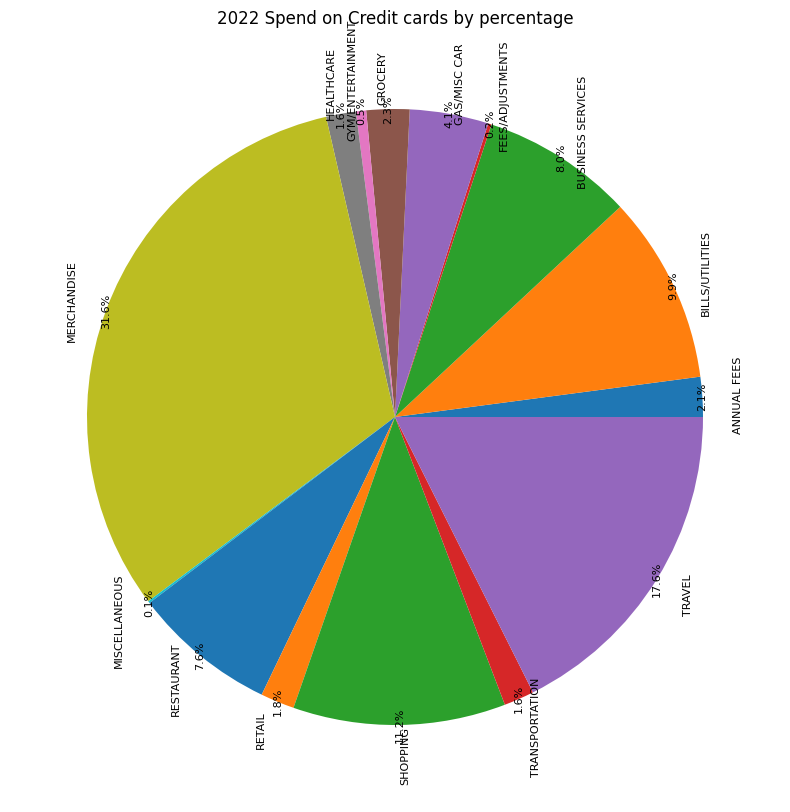

In [461]:
category_totals = cc.groupby('Category')['Spend'].sum()
plt.figure(figsize=(10, 10))
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%',pctdistance=1,textprops={'fontsize': 8,'rotation': 90,})
plt.title('2022 Spend on Credit cards by percentage')









([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'ANNUAL FEES'),
  Text(1, 0, 'BILLS/UTILITIES'),
  Text(2, 0, 'BUSINESS SERVICES'),
  Text(3, 0, 'FEES/ADJUSTMENTS'),
  Text(4, 0, 'GAS/MISC CAR'),
  Text(5, 0, 'GROCERY'),
  Text(6, 0, 'GYM/ENTERTAINMENT'),
  Text(7, 0, 'HEALTHCARE'),
  Text(8, 0, 'MERCHANDISE'),
  Text(9, 0, 'MISCELLANEOUS'),
  Text(10, 0, 'RESTAURANT'),
  Text(11, 0, 'RETAIL'),
  Text(12, 0, 'SHOPPING'),
  Text(13, 0, 'TRANSPORTATION'),
  Text(14, 0, 'TRAVEL')])

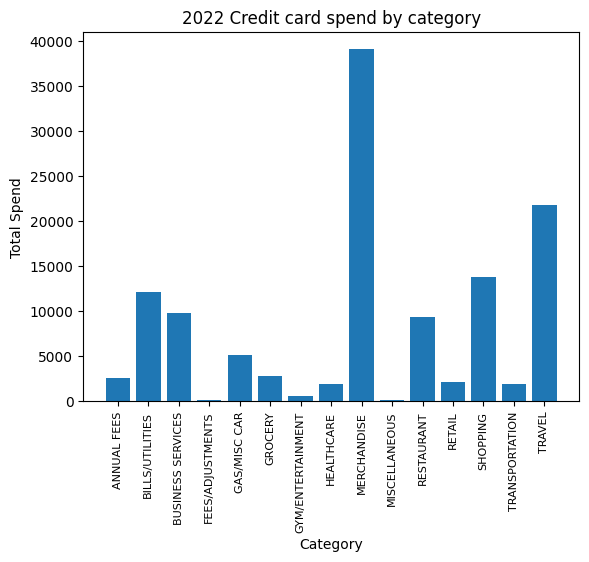

In [462]:
plt.bar(category_totals.index, category_totals)
plt.xlabel('Category')
plt.ylabel('Total Spend')
plt.title('2022 Credit card spend by category')
plt.xticks(rotation=90,fontsize=8)


Make a separate month column and show spend per month

In [463]:
cc['Date'] = pd.to_datetime(cc['Date'], format='%m/%d/%y')
cc['Month'] = cc['Date'].dt.month
monthly_spend = cc.groupby('Month')['Spend'].sum()

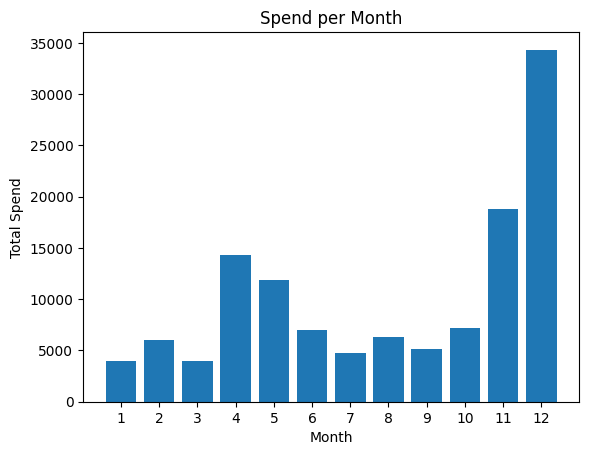

In [464]:
plt.bar(monthly_spend.index, monthly_spend)
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.title('Spend per Month')
plt.xticks(range(1, 13))
plt.show()